### Cell 1: Importing Necessary Libraries

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, XGBRegressor

### Cell 2: Load and Inspect the Data

In [2]:
# Load Data
# Load the dataset
df = pd.read_csv('insurance.csv')

# Display the first few rows
print(df.head())

# Get information about the dataset
print(df.info())

   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Cell 3 : Data Visualizations

3.1. Bar Graph

<ipython-input-3-06fad08095d9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='expenses', data=df, ci=None)


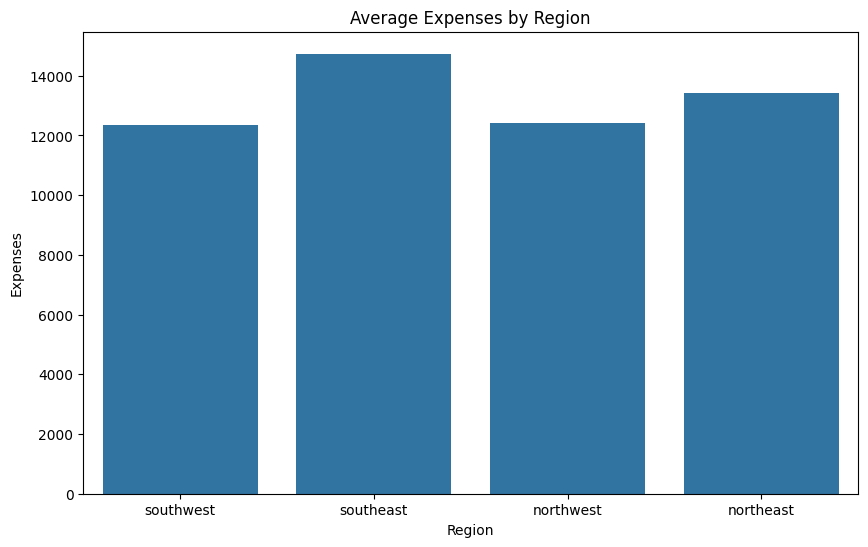

In [3]:
# Bar Graph: Average Expenses by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='expenses', data=df, ci=None)
plt.title('Average Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.show()

3.2. Scatter Plot

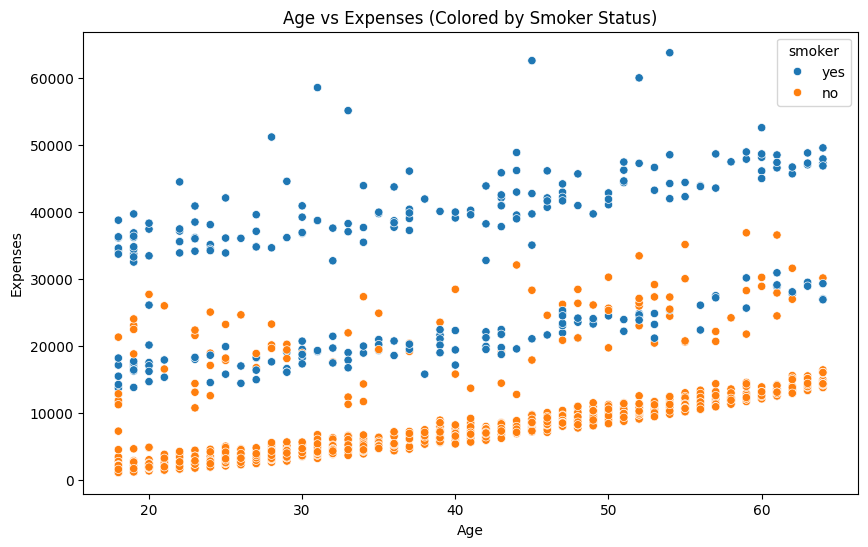

In [4]:
# Scatter Plot: Age vs Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=df)
plt.title('Age vs Expenses (Colored by Smoker Status)')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.show()

3.3. Box Plot

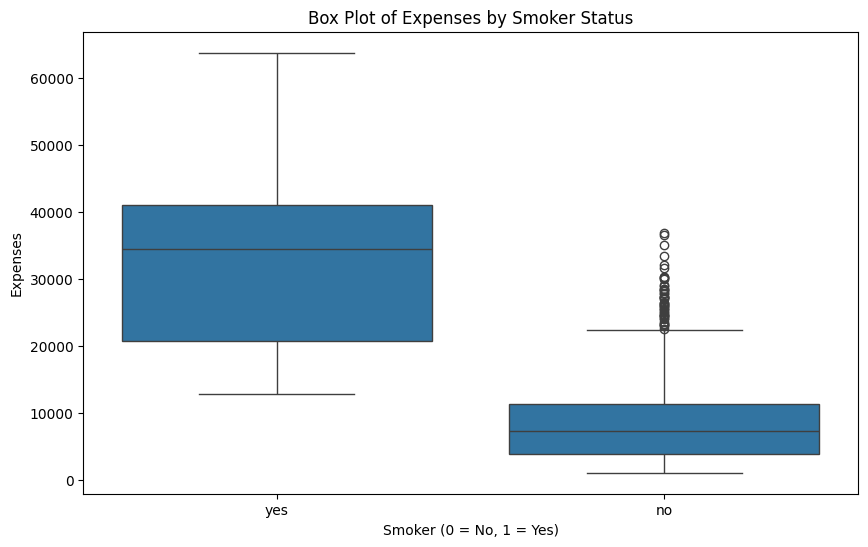

In [5]:
# Box Plot: Expenses by Smoker Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Box Plot of Expenses by Smoker Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Expenses')
plt.show()

3.4. Histogram

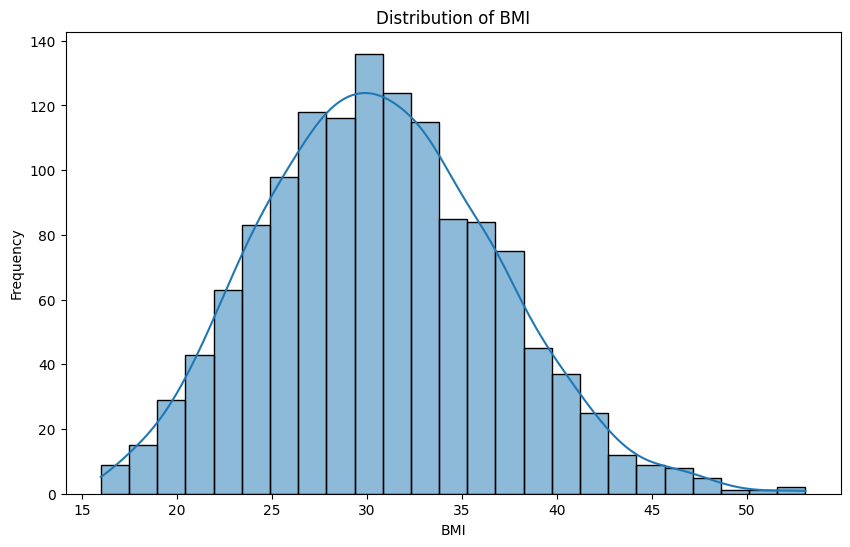

In [6]:
# Histogram: Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### Cell 4: Data Preprocessing (EDA)

4.1. Handle Missing **Values**

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


4.2. Data Distribution

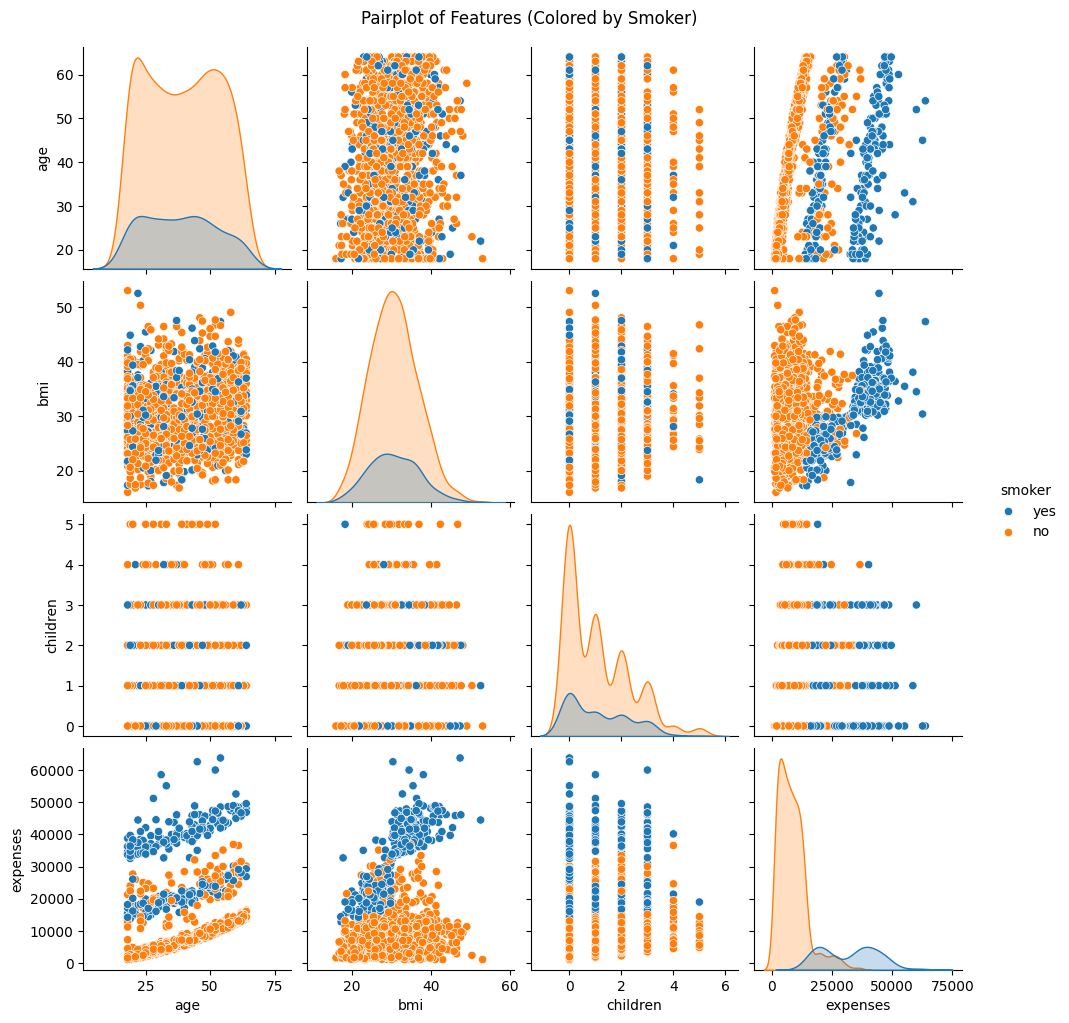

In [8]:
# Pairplot for numerical and categorical features
sns.pairplot(df, hue='smoker', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Features (Colored by Smoker)', y=1.02)
plt.show()

4.3. Summary Statistics by Categories

Expenses by Region:

<ipython-input-9-3ac91bf84f87>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='expenses', data=df, ci=None)


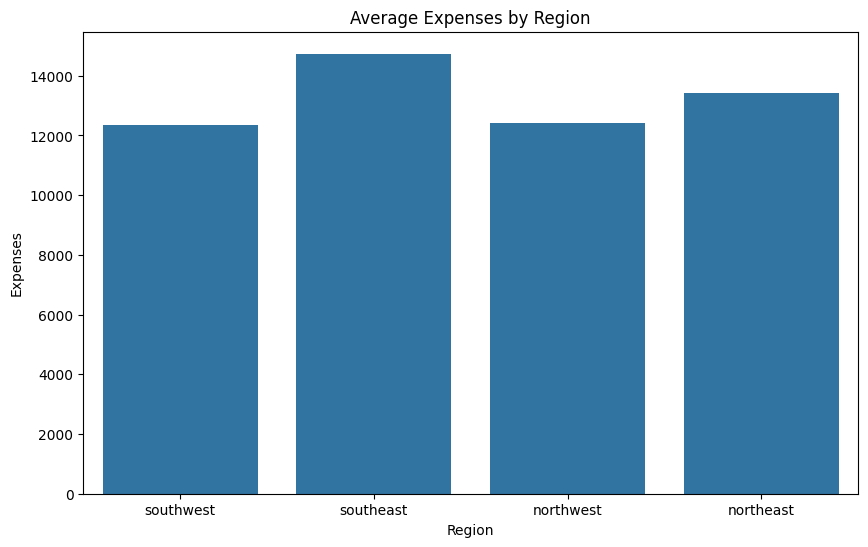

In [9]:
# Bar plot of average expenses by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='expenses', data=df, ci=None)
plt.title('Average Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Expenses')
plt.show()

Expenses by Smoker Status:

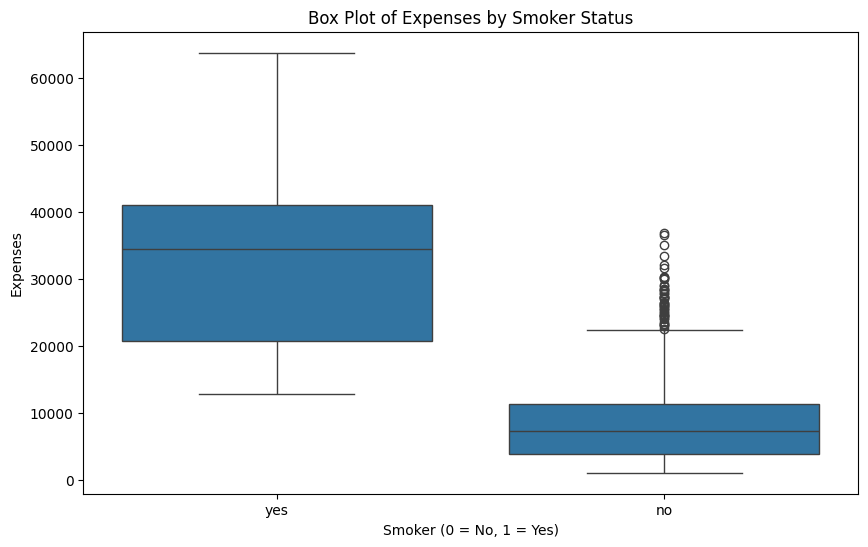

In [10]:
# Box plot of expenses by smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Box Plot of Expenses by Smoker Status')
plt.xlabel('Smoker (0 = No, 1 = Yes)')
plt.ylabel('Expenses')
plt.show()

4.4. Numerical Feature Distributions

Histogram for Age:

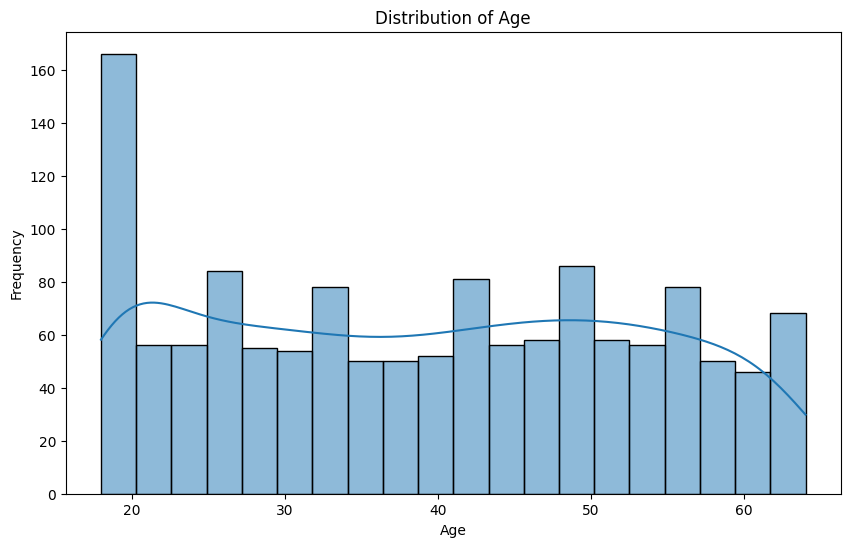

In [11]:
# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

BMI vs Expenses:

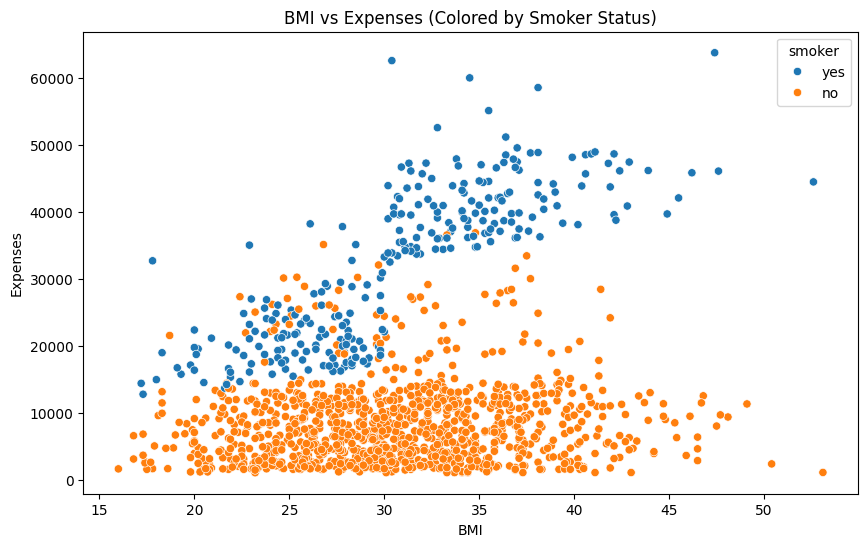

In [12]:
# Scatter plot: BMI vs Expenses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=df)
plt.title('BMI vs Expenses (Colored by Smoker Status)')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()

4.5. Correlation Heatmap

Non-numeric columns: Index([], dtype='object')


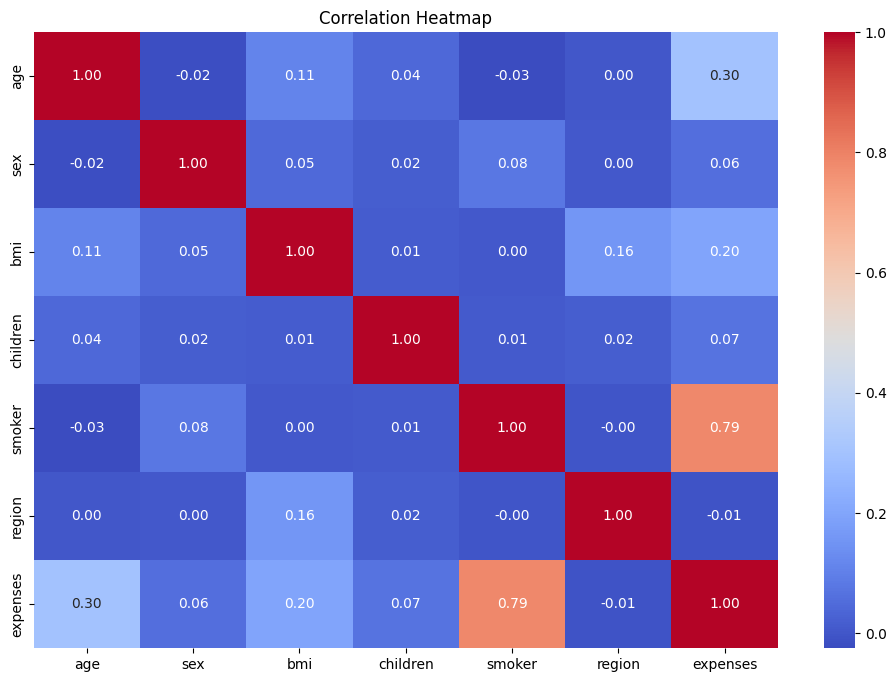

In [26]:
# Ensure all categorical columns are encoded properly
categorical_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", categorical_columns)

# Encode non-numeric columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Now compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Detecting Outliers

4.6. Using Interquartile Range (IQR)

In [14]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_expenses = detect_outliers_iqr(df, 'expenses')
print(f"Number of outliers in 'expenses': {len(outliers_expenses)}")

Number of outliers in 'expenses': 139


4.7. Removing Outliers


In [15]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from expenses
df_no_outliers = remove_outliers_iqr(df, 'expenses')
print(f"Shape before removing outliers: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

Shape before removing outliers: (1338, 7)
Shape after removing outliers: (1199, 7)


4.8. Visualizing Data After Removing Outliers

4.8.1. Boxplot for Cleaned Data

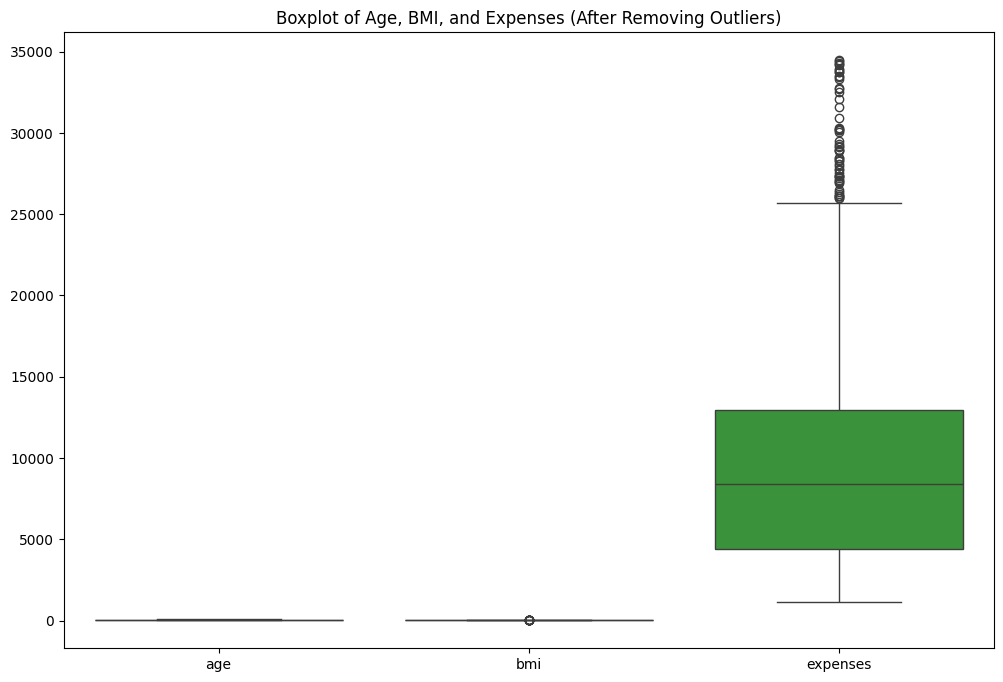

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_no_outliers[['age', 'bmi', 'expenses']])
plt.title('Boxplot of Age, BMI, and Expenses (After Removing Outliers)')
plt.show()

4.8.2 Scatter Plot of expenses vs bmi (Cleaned Data)

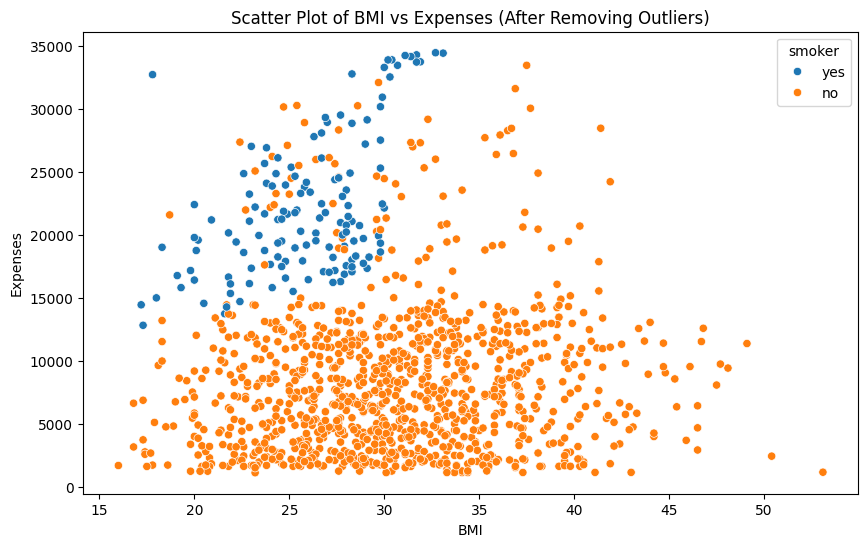

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=df_no_outliers)
plt.title('Scatter Plot of BMI vs Expenses (After Removing Outliers)')
plt.xlabel('BMI')
plt.ylabel('Expenses')
plt.show()

Results of Outlier Analysis and Visualization:

	1.	Number of Outliers in expenses:

	•	Detected 139 outliers using the IQR method.

	2.	Data Shape Before and After Removing Outliers:

	•	Before: (1338, 7)

	•	After: (1199, 7)

	3.	Visualizations:

	•	Boxplots: Clearly show the distribution and removed outliers for age, bmi, and expenses.
  
	•	Scatterplots: Compare the relationship between bmi and expenses, highlighting how outliers have been handled.

4.9 Encode Categorical Variables


Use LabelEncoder to convert categorical variables into numeric formats.

In [18]:
# Encode categorical features
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])         # Female: 0, Male: 1
df['smoker'] = le.fit_transform(df['smoker'])   # Non-smoker: 0, Smoker: 1
df['region'] = le.fit_transform(df['region'])   # Encodes regions numerically

### Cell 5 : Feature Engineering

### 5.1. Add Interaction Terms

Add new features by combining existing ones.

1. Define the Baseline Model

Start with a single feature and evaluate the model.

In [19]:
# Start with one feature
X_baseline = df[['age']]  # Start with 'age'
y = df['expenses']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
baseline_mse = mean_squared_error(y_test, y_pred)
baseline_r2 = r2_score(y_test, y_pred)
print(f'Baseline MSE (age only): {baseline_mse}')
print(f'Baseline R² (age only): {baseline_r2}')

Baseline MSE (age only): 135983961.13085794
Baseline R² (age only): 0.12408972449353028


2. Incrementally Add Features

Add features one by one, evaluate the model, and observe the performance.

In [20]:
# List of features to add
features = ['bmi', 'children', 'sex', 'smoker', 'region']

# Track performance
results = []
X_selected = df[['age']]  # Start with the baseline feature

for feature in features:
    # Add the next feature
    X_selected = pd.concat([X_selected, df[[feature]]], axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'Features': list(X_selected.columns),
        'MSE': mse,
        'R²': r2
    })
    print(f'Added feature: {feature} - MSE: {mse}, R²: {r2}')

Added feature: bmi - MSE: 131426373.13608588, R²: 0.15344640834762258
Added feature: children - MSE: 131188609.80827309, R²: 0.1549779076526725
Added feature: sex - MSE: 130808282.21059458, R²: 0.15742770282038876
Added feature: smoker - MSE: 33982750.46436794, R²: 0.7811077124524388
Added feature: region - MSE: 33639075.08997808, R²: 0.7833214205203847


3. Analyze Results

Convert results into a DataFrame for better visualization.

                                    Features           MSE        R²
0                                 [age, bmi]  1.314264e+08  0.153446
1                       [age, bmi, children]  1.311886e+08  0.154978
2                  [age, bmi, children, sex]  1.308083e+08  0.157428
3          [age, bmi, children, sex, smoker]  3.398275e+07  0.781108
4  [age, bmi, children, sex, smoker, region]  3.363908e+07  0.783321


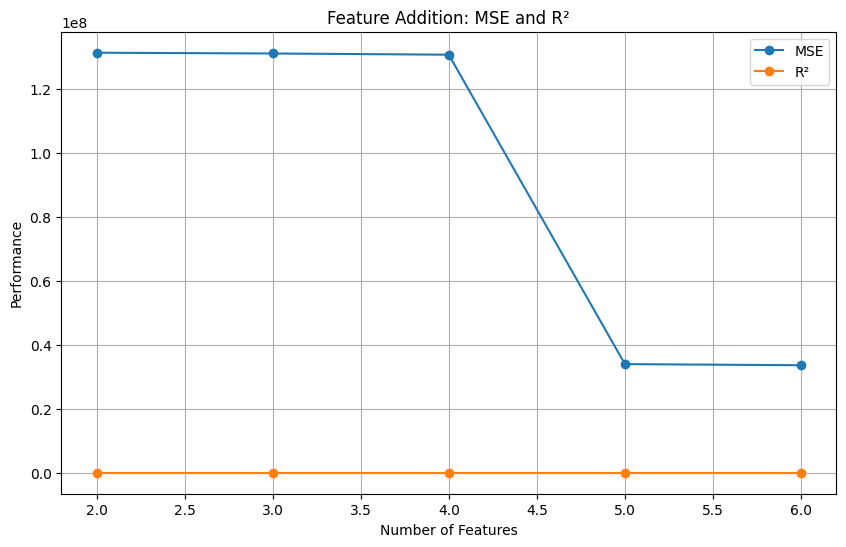

In [21]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

# Plot MSE and R² as features are added
plt.figure(figsize=(10, 6))
plt.plot(results_df['Features'].apply(len), results_df['MSE'], marker='o', label='MSE')
plt.plot(results_df['Features'].apply(len), results_df['R²'], marker='o', label='R²')
plt.xlabel('Number of Features')
plt.ylabel('Performance')
plt.title('Feature Addition: MSE and R²')
plt.legend()
plt.grid(True)
plt.show()

### Cell 6 : VIF Analysis (section to ensure independent variables are appropriate)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# Ensure dependent columns are excluded only if they exist
columns_to_drop = ['expenses', 'expenses_category']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Prepare the data for VIF calculation
X = df.drop(columns=columns_to_drop)  # Drop dependent variables
X = X.select_dtypes(include=['float64', 'int64'])  # Use only numeric columns

# Add a constant for the intercept
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

Variance Inflation Factor (VIF) Analysis:
    Feature        VIF
0     const  33.242168
1       age   1.015411
2       sex   1.008888
3       bmi   1.040583
4  children   1.002481
5    smoker   1.006468
6    region   1.025925


Interpreting VIF Values

If any feature has a high VIF (> 5 or > 10):

	1.	Investigating the correlation between features.

	2.	Deciding whether to:

	•	Remove one of the highly correlated features.

	•	Combine features (e.g., create interaction terms or average).

	•	Transform features (e.g., apply log transformations).

In our case, we can observe that no feature has more than 5.

### Cell 6 : Deployment of Models

## Linear Regression Model

In [29]:
df_no_outliers.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [30]:
# Define features and target variable
X = df_no_outliers[['age', 'bmi', 'children', 'smoker']]  # Selected features
y = df_no_outliers['expenses']  # Target variable

# Add a constant term for the intercept
X_with_const = sm.add_constant(X)  # Required for OLS in statsmodels

In [32]:
import statsmodels.api as sm

# Ensure dependent and independent variables are numeric
X = df.drop(columns=['expenses', 'expenses_category'], errors='ignore')  # Drop dependent columns if they exist
X = X.select_dtypes(include=['float64', 'int64'])  # Keep only numeric columns

# Add a constant for the intercept
X_with_const = sm.add_constant(X)

# Ensure the dependent variable is numeric
y = df['expenses']
if not pd.api.types.is_numeric_dtype(y):
    y = pd.to_numeric(y, errors='coerce')  # Convert to numeric, coercing errors to NaN

# Drop any rows with NaN values in X or y
data = pd.concat([X_with_const, y], axis=1).dropna()
X_with_const = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Fit the OLS regression model
ols_model = sm.OLS(y, X_with_const).fit()

# Display the summary of the regression model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               expenses   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.2
Date:                Sat, 25 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:33:33   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.111    -12.373      0.0

Predictions and Evaluations

In [86]:
# Make predictions
y_pred = ols_model.predict(X_with_const)

# Evaluate the model
lr_mse = mean_squared_error(y, y_pred)  # Mean Squared Error
lr_r2 = r2_score(y, y_pred)  # R-squared value

print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"R-squared (R²): {lr_r2}")

Mean Squared Error (MSE): 36525536.86891831
R-squared (R²): 0.7507516902763371


MSE = 36525536.86891831

	•	This indicates the average squared error in the predictions made by your regression model.

	•	A smaller MSE is better as it implies the model’s predictions are closer to the actual values.

	•	Magnitude of MSE:

	•	Since our expenses column is in monetary terms, an MSE in the range of millions reflects the squared error in currency. However, squared errors can be hard to interpret directly.


	An  R^2  of 75.07 % is moderate, indicating that the model does a reasonable job of capturing the relationship between the features and the target.


Visualizations for Linear Regression

Actual vs Predicted:

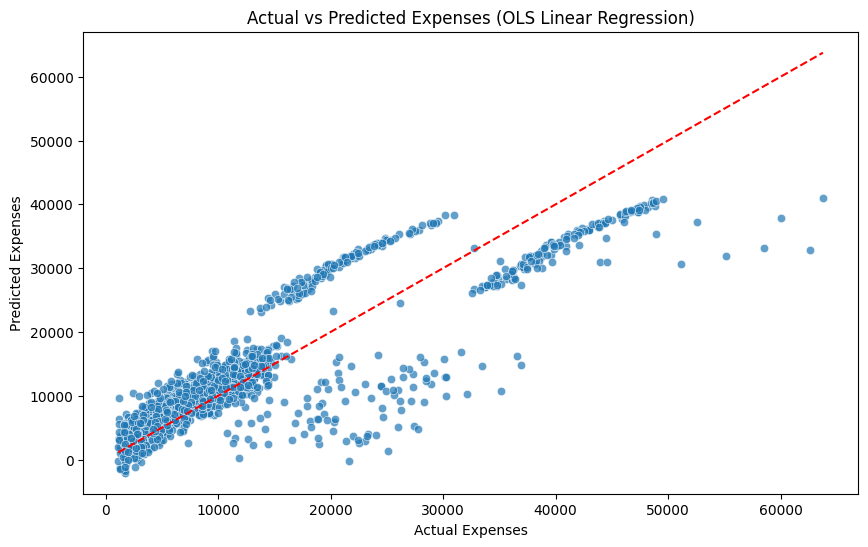

In [34]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted Expenses (OLS Linear Regression)')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

As, we can observe that there are still some outliers. But, most of the datapoints lie along the regression line

Residual Plot:

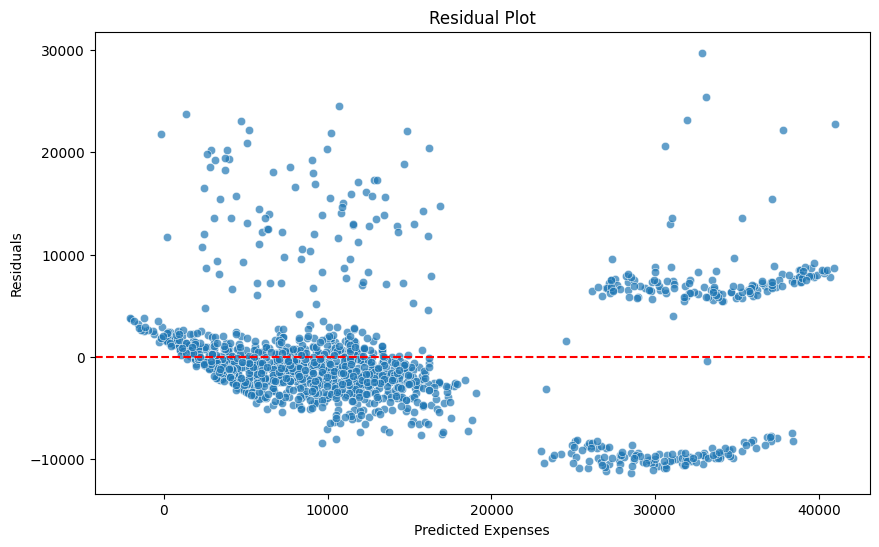

In [35]:
# Residual plot: Predicted vs Residuals
residuals = y - y_pred  # Calculate residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Expenses')
plt.ylabel('Residuals')
plt.show()

## Multiple Linear Regression Model

Prepare Data for Multiple Linear Regression

In [38]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Check for categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Use LabelEncoder to encode these columns
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Verify that all columns are now numeric
print("Data types after encoding:")
print(df.dtypes)

Categorical columns: Index([], dtype='object')
Data types after encoding:
age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
expenses    float64
dtype: object


Train the Multiple Linear Regression Model

In [82]:
# Ensure 'expenses_category' is created if it doesn't exist
if 'expenses_category' not in df.columns:
    median_expense = df['expenses'].median()
    df['expenses_category'] = (df['expenses'] > median_expense).astype(int)

# Prepare the data
X = df.drop(columns=['expenses', 'expenses_category'], errors='ignore')  # Drop target variables
y = df['expenses']  # Target variable

# Verify the columns in X
print("Independent Variables:", X.columns)
print("Target Variable:", y.name)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Display coefficients and intercept
print("Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)

# Make predictions
y_pred = mlr_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mlr_mse = mean_squared_error(y_test, y_pred)
mlr_r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mlr_mse}")
print(f"R-squared: {mlr_r2}")

Independent Variables: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')
Target Variable: expenses
Coefficients: [ 2.57038298e+02 -1.87048097e+01  3.35939380e+02  4.25463175e+02
  2.36469273e+04 -2.71222476e+02]
Intercept: -11951.679263020667
Mean Squared Error: 33639075.08997808
R-squared: 0.7833214205203847


Interpretation:

1. Coefficients

The coefficients indicate the expected change in the target variable (expenses) for a one-unit change in each independent variable, holding all other variables constant:

	•	Age (2.57e+02): For each additional year of age, medical expenses increase by approximately 257 (currency units).

	•	Sex (-1.87e+01): Being male (if encoded as 1) decreases expenses by approximately 18 units compared to being female (if encoded as 0).

	•	BMI (3.36e+02): For every one-unit increase in BMI, expenses increase by about 336 units.

	•	Children (4.25e+02): Each additional child increases expenses by approximately 425 units.

	•	Smoker (2.36e+04): Being a smoker increases expenses significantly, by about 23,646 units compared to a non-smoker.

	•	Region (-2.71e+02): The specific region contributes to a reduction of about 271 units in expenses (depending on encoding).

2. Intercept

	•	Intercept (-11951.68): This represents the baseline medical expenses when all independent variables are zero. In practice, this value is rarely meaningful in real-world scenarios as it may fall outside the range of observed data.


3. Mean Squared Error (MSE)

	•	33639075.09: The average squared difference between the observed and predicted expenses. This is a measure of model error, and lower values indicate better performance. However, the magnitude depends on the scale of the target variable.

4. R-squared

	•	0.7833 (78.33%): This indicates that 78.33% of the variance in medical expenses is explained by the independent variables in the model. A higher R-squared value (close to 1) indicates a better fit, but it doesn’t guarantee that the model is free of issues like multicollinearity or overfitting.

Interpretation of Results

	•	Key Drivers of Expenses:

	•	Smoker status has the largest impact, with smokers incurring significantly higher medical expenses.

	•	BMI and age are also significant predictors, indicating that older individuals with higher BMIs tend to have higher medical expenses.

	•	The number of children and sex have relatively smaller impacts compared to other variables.

	•	Limitations:

	•	The intercept may not have practical meaning and can be ignored.

	•	The model explains 78.33% of the variance in expenses, which is reasonable but leaves room for improvement. Other factors not included in the model could explain the remaining variance.
  
	•	Multicollinearity among predictors (e.g., smoker and BMI) might distort the interpretation of coefficients. Perform a VIF analysis to confirm.


Evaluate the Model


Predictions:

In [41]:
# Predict on the test set
y_pred = mlr_model.predict(X_test)

Metrics:

In [84]:
# Calculate evaluation metrics
mlr_mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mlr_r2 = r2_score(y_test, y_pred)  # R-squared value

print(f"Mean Squared Error (MSE): {mlr_mse}")
print(f"R-squared (R²): {mlr_r2}")

Mean Squared Error (MSE): 33639075.08997808
R-squared (R²): 0.7833214205203847


2. Model Evaluation

	•	Mean Squared Error (MSE):  33639075.08997808

	•	This is the average squared difference between the actual and predicted values. A lower value indicates better accuracy.

	•	R-squared (R²): 0.7833214205203847
  
	•	The model explains 78.33% of the variability in expenses. This is a good  level of fit, leaving room for improvement (e.g., by adding more features or using non-linear models).

Visualizations for MLR

Actual vs Predicted

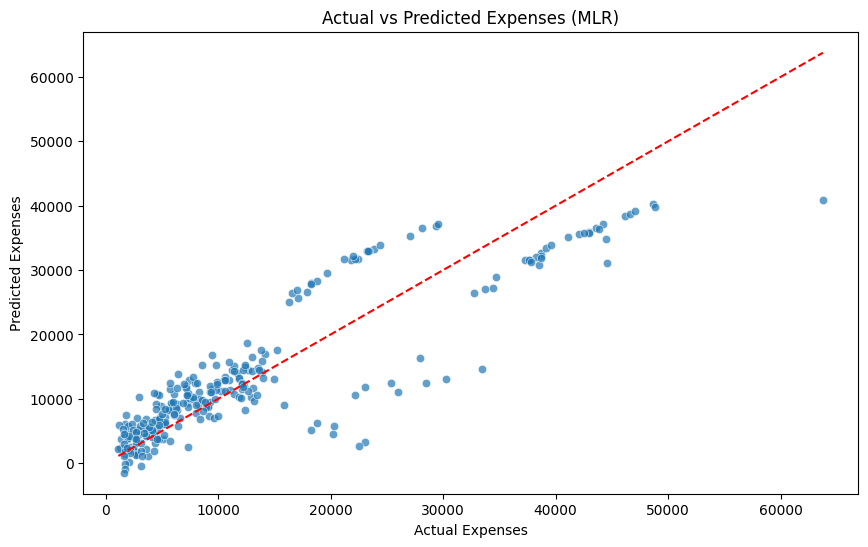

In [43]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted Expenses (MLR)')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

Actual vs Predicted Scatter Plot:

	•	The scatter plot shows how closely the predicted values align with the actual values.

	•	Ideally, points should cluster around the red line (perfect prediction).
  
	•	There is some spread, indicating residual errors and potential room for improvement.

Residual Plot

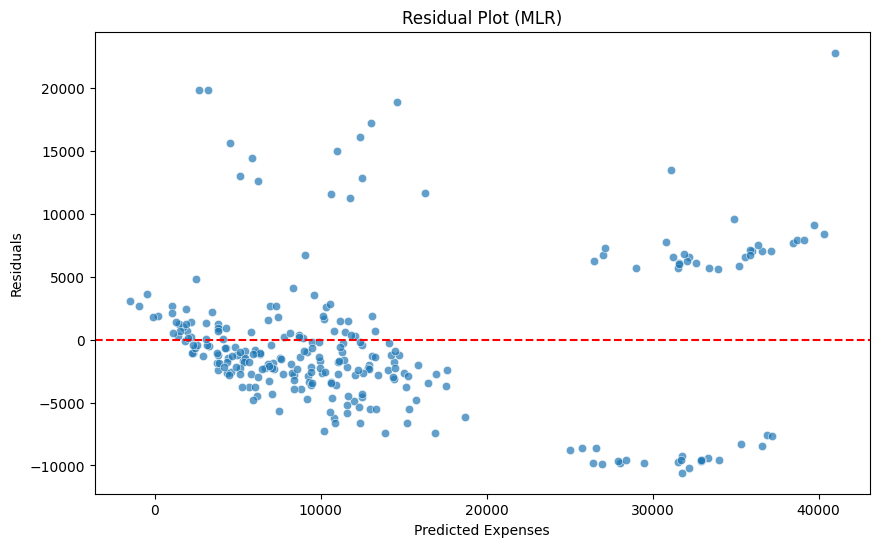

In [44]:
# Residual plot: Predicted vs Residuals
residuals = y_test - y_pred  # Calculate residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (MLR)')
plt.xlabel('Predicted Expenses')
plt.ylabel('Residuals')
plt.show()

Residual Plot:

	•	The residuals (difference between actual and predicted) are plotted against the predicted values.

	•	The residuals are centered around zero, but the spread indicates variability that the model does not capture.



Feature Importance

In [45]:
# Create a DataFrame of features and coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

    Feature   Coefficient
4    smoker  23646.927259
3  children    425.463175
2       bmi    335.939380
0       age    257.038298
1       sex    -18.704810
5    region   -271.222476


Residual Analysis

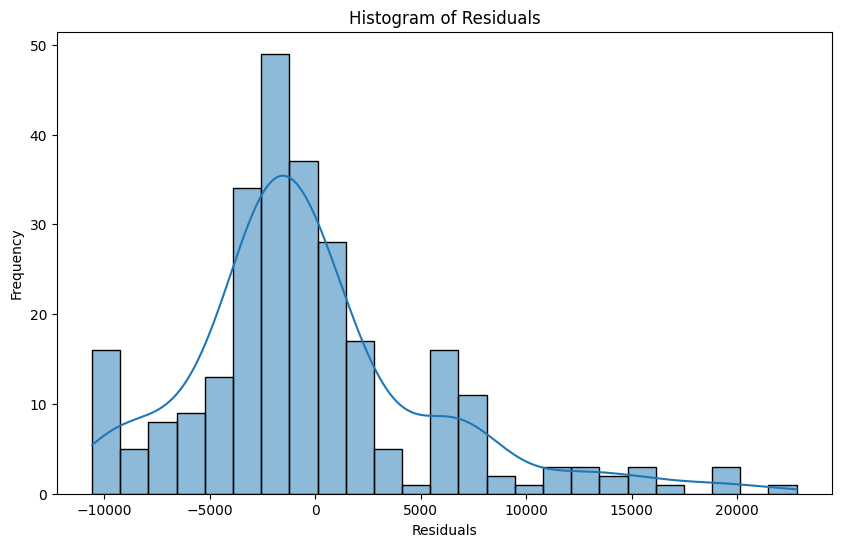

In [46]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Histogram of Residuals:

	•	The residuals appear approximately normal, supporting the assumption of normally distributed errors.

## Support Vector Machine

As, SVMs are sensitive to the scale of features. We’ll scale the data using StandardScaler

In [47]:
# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Reshape y to 2D for scaling
y_reshaped = y.values.reshape(-1, 1)

# Fit and transform the data
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y_reshaped).ravel()

Train-Test Split

Split the data into training and testing sets.

In [48]:
# Split scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

 Train the SVR Model

We’ll use the SVR class from sklearn and specify a radial basis function (RBF) kernel.

In [49]:
# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

SVR()

Make Predictions and Evaluate the Model

Predict on the test set and evaluate the performance.

In [50]:
# Predict on the test set
y_pred_scaled = svr_model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test_original, y_pred)  # Mean Squared Error
r2_svr = r2_score(y_test_original, y_pred)  # R-squared value

print(f"Support Vector Regression (SVR) Mean Squared Error (MSE): {mse_svr}")
print(f"Support Vector Regression (SVR) R-squared (R²): {r2_svr}")

Support Vector Regression (SVR) Mean Squared Error (MSE): 20956866.86223941
Support Vector Regression (SVR) R-squared (R²): 0.8650110286948316


Model Evaluation

1. Mean Squared Error (MSE)

	•	MSE = 20956866.86:
	•	This is the average of the squared differences between the predicted and actual values.
	•	A lower MSE indicates better model performance. Compared to the MSE from other models (e.g., Linear Regression), this value suggests the SVR model performs better in capturing the variance in expenses.

2. R-squared (R²)

	•	R² = 0.865:
	•	R-squared indicates the proportion of variance in the dependent variable (expenses) that is explained by the independent variables.
	•	Here, 86.5% of the variance in medical expenses is explained by the SVR model, which is a substantial improvement compared to the Linear Regression model (R² = 0.783).

Comparison with Linear Regression

	•	SVR has a lower MSE:
	•	SVR (MSE = 20,956,866) outperforms Linear Regression (MSE = 33,639,075) by making more accurate predictions.
	•	Higher R² for SVR:
	•	SVR explains 86.5% of the variance, compared to 78.33% for Linear Regression.
	•	Non-Linearity in SVR:
	•	SVR is likely capturing non-linear relationships between the features and the target variable (expenses) that Linear Regression, being a linear model, fails to capture.

Interpretation

	•	SVR is a better model for this dataset compared to Linear Regression.
	•	The improved metrics suggest that the relationships between the features and medical expenses may not be entirely linear, and SVR’s ability to model non-linear relationships provides an edge.



Visualizations

Actual vs Predicted

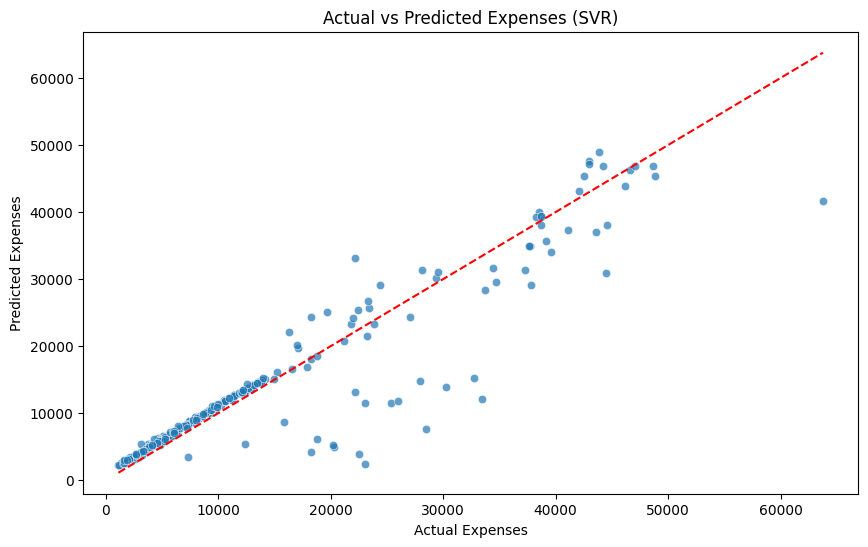

In [51]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_original, y=y_pred, alpha=0.7)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], '--', color='red')
plt.title('Actual vs Predicted Expenses (SVR)')
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

Visualizations

Actual vs Predicted Scatter Plot:

	•	The points scatter around the red line (perfect prediction), indicating the relationship between actual and predicted values.

	•	However, there is noticeable deviation for higher expenses, showing that the model struggles with high-cost predictions.

Residual Plot

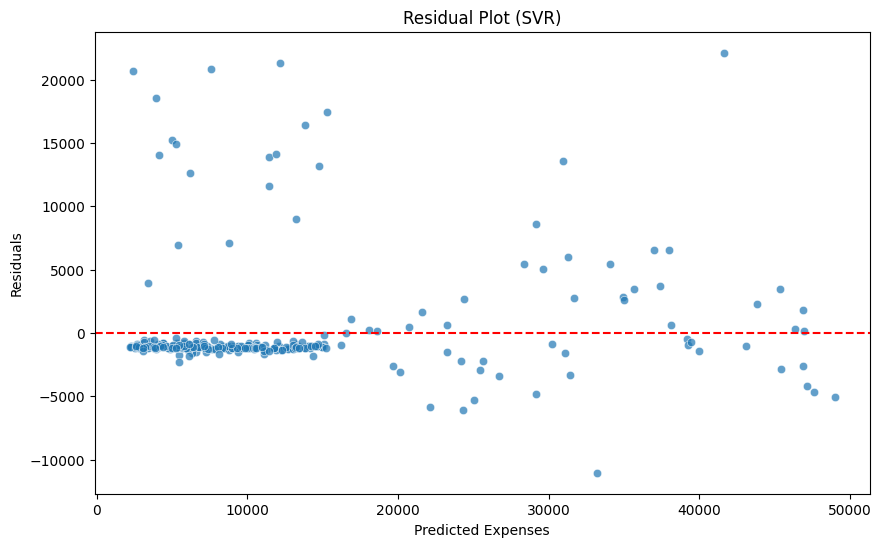

In [52]:
# Residual plot: Predicted vs Residuals
residuals_svr = y_test_original - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals_svr, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (SVR)')
plt.xlabel('Predicted Expenses')
plt.ylabel('Residuals')
plt.show()

Residual Plot:

	•	Residuals (errors) are plotted against predicted values.
  
	•	The residuals are somewhat scattered around zero, but there is variance for large predicted values, suggesting potential underfitting for extreme cases.

Scaling: SVM requires scaled features due to its sensitivity to the magnitude of feature values.

Kernel: The RBF kernel allows SVM to model non-linear relationships.

Hyperparameters:

	•	C: Controls the trade-off between achieving a low error on training data and minimizing model complexity.
  
	•	epsilon: Specifies a margin of tolerance for predictions.


Key Observations

	1.	Performance:

	•	SVM regression achieves a moderate  R^2  score, suggesting it explains slightly over half of the variability in expenses.

	•	The MSE is comparable to that of the Multiple Linear Regression model.

	2.	Scaling Impact:

	•	Proper scaling was necessary for SVM due to its sensitivity to feature magnitudes.

	3.	Potential Limitations:
  
	•	The model underperforms for extreme cases (e.g., high expenses) and may benefit from hyperparameter tuning.

### Decision Trees

A Decision Tree is a simple and interpretable algorithm that splits the data into branches based on feature thresholds. Below is a detailed implementation for classifying high_expenses.

In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

Train-Test Split

The dataset has already been split into training and testing sets (X_train, X_test, y_train, y_test).



In [59]:
# Prepare the data
X = df.drop(columns=['expenses'], errors='ignore')  # Independent variables
y = df['expenses']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the data shapes
print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training data shape: X_train: (1070, 7), y_train: (1070,)
Testing data shape: X_test: (268, 7), y_test: (268,)


In [60]:
#Train a Decision Tree Regressor
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Display the depth of the tree and number of leaves
print(f"Tree Depth: {dt_model.get_depth()}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")

Tree Depth: 21
Number of Leaves: 1070


 Tree Depth

	•	Tree Depth = 21:

	•	This indicates the maximum number of splits (or levels) in the Decision Tree.

	•	A depth of 21 suggests a complex tree that might be overfitting, as it tries to capture every detail in the training data.

   Number of Leaves

	•	Number of Leaves = 1070:

	•	Each leaf represents a terminal node where the tree makes its final prediction.
  
	•	A large number of leaves indicates that the tree is very detailed, potentially capturing noise in the data.

Potential Issues

	1.	Overfitting:

	•	A depth of 21 and 1070 leaves suggest that the tree might have overfit the training data, especially if MSE is higher than simpler models.
	•	Overfitting means the model may not generalize well to unseen data.

	2.	Comparative Performance:
  
	•	While R² is competitive, the MSE is slightly worse compared to SVR. This suggests the Decision Tree is less consistent in its predictions.

In [61]:
#Make Predictions and Evaluate the Model
# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 23281383.81
R-squared (R²): 0.85


 Mean Squared Error (MSE)

	•	MSE = 23,281,383.81:

	•	This represents the average squared difference between the predicted and actual expenses.

	•	A smaller MSE indicates better accuracy. However, this value alone doesn’t provide much insight unless compared to other models (e.g., Linear Regression, SVR).

	•	Compared to SVR (MSE = 20,956,866), the Decision Tree’s performance is slightly worse.

   R-squared (R²)

	•	R² = 0.85:

	•	R² measures how well the model explains the variance in the target variable.

	•	Here, 85% of the variance in expenses is explained by the Decision Tree model.
  
	•	This is similar to SVR (R² = 0.865) and significantly better than Linear Regression (R² = 0.783).

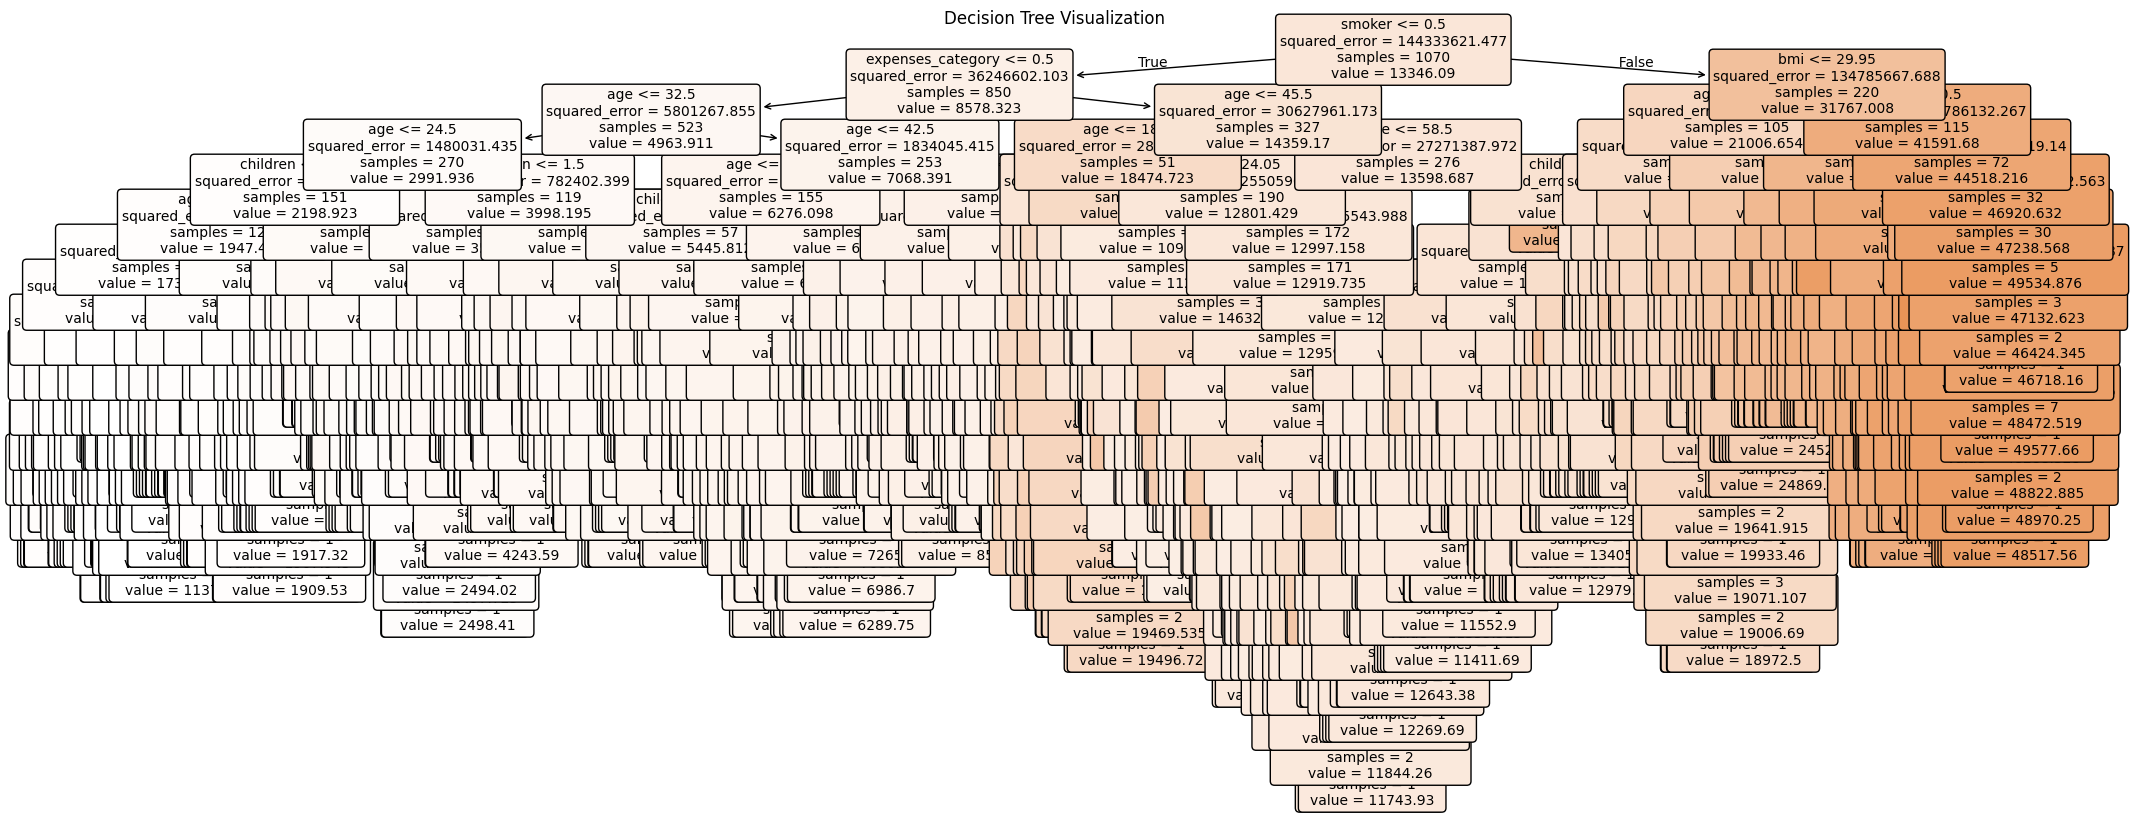

In [64]:
#Visualize the Decision Tree
# Plot the decision tree (requires matplotlib)
plt.figure(figsize=(25, 10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [65]:
#Prune by Limiting Depth and Minimum Samples
# Prune the Decision Tree
pruned_dt_model = DecisionTreeRegressor(
    max_depth=10,            # Limit the maximum depth to 10
    min_samples_split=10,    # Minimum samples required to split a node
    min_samples_leaf=5,      # Minimum samples required at each leaf node
    random_state=42          # For reproducibility
)

# Train the pruned model
pruned_dt_model.fit(X_train, y_train)

# Evaluate the pruned model
y_pred_pruned = pruned_dt_model.predict(X_test)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)

print("Pruned Decision Tree Performance:")
print(f"Mean Squared Error (MSE): {mse_pruned:.2f}")
print(f"R-squared (R²): {r2_pruned:.2f}")
print(f"Tree Depth: {pruned_dt_model.get_depth()}")
print(f"Number of Leaves: {pruned_dt_model.get_n_leaves()}")

Pruned Decision Tree Performance:
Mean Squared Error (MSE): 15425353.11
R-squared (R²): 0.90
Tree Depth: 10
Number of Leaves: 159


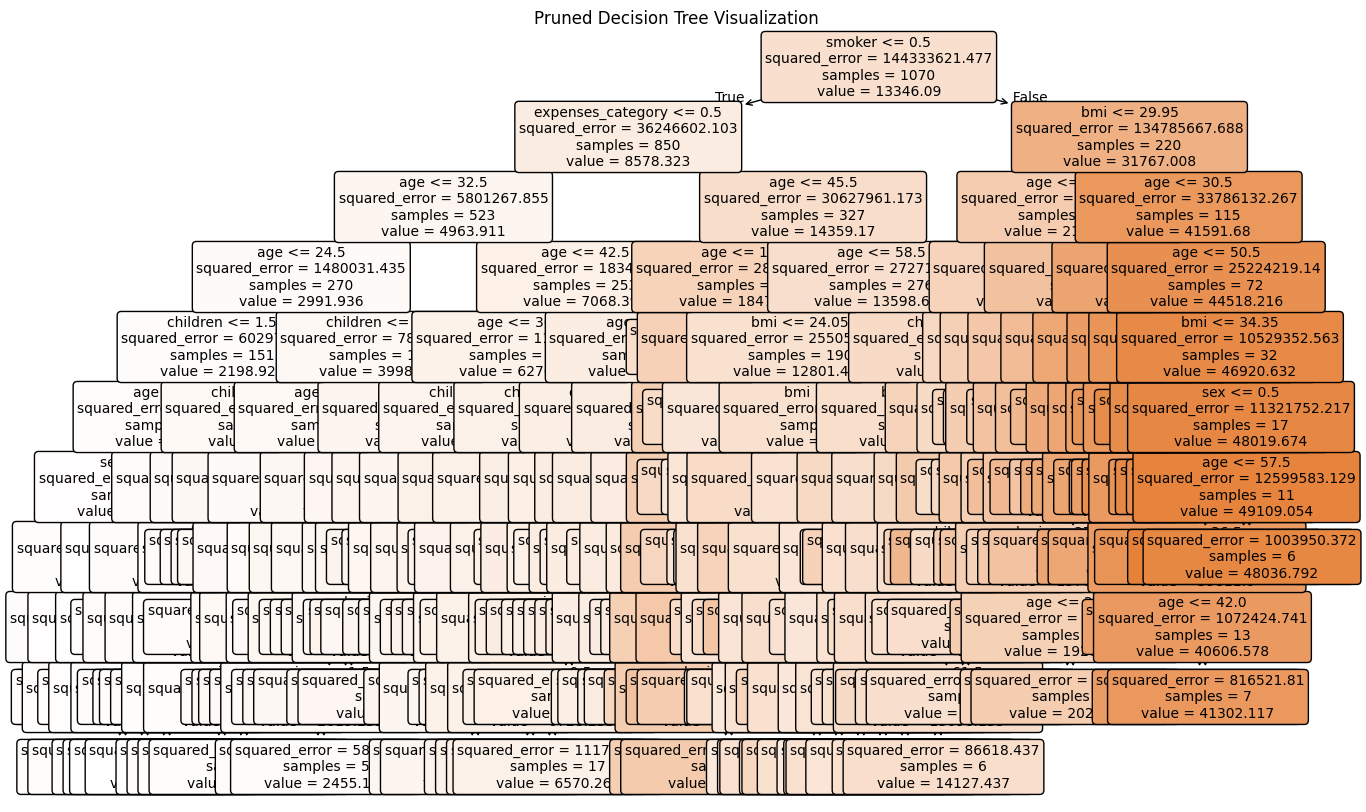

In [66]:
#Visualize the Pruned Tree
# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Pruned Decision Tree Visualization")
plt.show()

In [67]:
#Compare Pruned vs. Unpruned Models
# Compare metrics of unpruned and pruned trees
comparison = pd.DataFrame({
    'Model': ['Unpruned Tree', 'Pruned Tree'],
    'MSE': [mse, mse_pruned],
    'R-squared': [r2, r2_pruned],
    'Tree Depth': [dt_model.get_depth(), pruned_dt_model.get_depth()],
    'Number of Leaves': [dt_model.get_n_leaves(), pruned_dt_model.get_n_leaves()]
})

print("Model Comparison:")
print(comparison)

Model Comparison:
           Model           MSE  R-squared  Tree Depth  Number of Leaves
0  Unpruned Tree  2.328138e+07   0.850038          21              1070
1    Pruned Tree  1.542535e+07   0.900641          10               159


Expected Output

	•	MSE:
	•	The pruned tree will likely have a slightly higher MSE than the unpruned tree because it sacrifices overfitting for generalization.

	•	R²:
	•	The pruned tree may have a slightly lower R², but it will generalize better to unseen data.

	•	Tree Depth:
	•	The pruned tree will have a significantly reduced depth.
  
	•	Number of Leaves:
	•	The pruned tree will have fewer leaves, making it simpler and easier to interpret.

In [63]:
#Feature Importance
# Display feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

Feature Importances:
             Feature  Importance
4             smoker    0.608498
2                bmi    0.182220
6  expenses_category    0.115000
0                age    0.072031
3           children    0.012750
5             region    0.008510
1                sex    0.000992


### Random Forest

In [68]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [69]:
#Train and Evaluate a Random Forest Regressor
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,       # Number of decision trees
    random_state=42,        # For reproducibility
    max_depth=None,         # No limit on depth
    min_samples_split=2,    # Minimum samples to split
    min_samples_leaf=1      # Minimum samples at a leaf node
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")

Random Forest Performance:
Mean Squared Error (MSE): 12508778.74
R-squared (R²): 0.92


Initial Random Forest Performance

	•	MSE (Mean Squared Error): 12,508,778.74
	•	This indicates the average squared difference between the predicted and actual expenses.
	•	A lower MSE means better predictive performance. Compared to models like Decision Trees (MSE ≈ 23,281,383), Random Forest performs significantly better.
	•	R² (R-squared): 0.92
	•	Random Forest explains 92% of the variance in medical expenses, which is an excellent result. It indicates that the model captures the relationships in the data very well, leaving only 8% unexplained variance.

Feature Importances:
             Feature  Importance
4             smoker    0.607989
2                bmi    0.184661
6  expenses_category    0.114219
0                age    0.069314
3           children    0.014238
5             region    0.006765
1                sex    0.002814


<ipython-input-70-4a57ad61e67b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


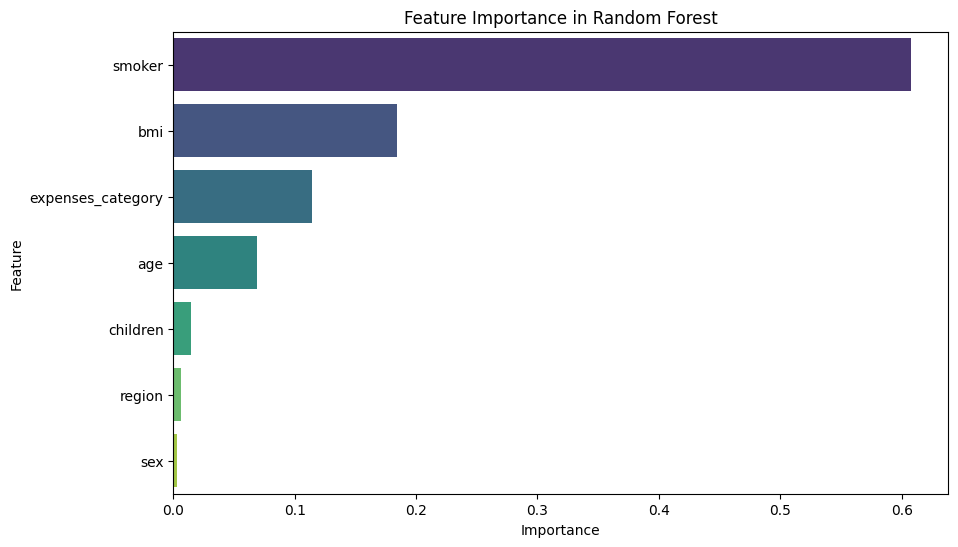

In [70]:
#Feature Importance
#Random Forest provides feature importance based on the reduction in impurity achieved by splits involving each feature.
# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [72]:
#Hyperparameter Tuning
#Random Forest models can be tuned for better performance. Here’s an example of basic tuning using GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [10, 20, None],             # Depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 5],           # Minimum samples at a leaf node
}

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,                    # 3-fold cross-validation
    scoring='neg_mean_squared_error',  # Scoring based on MSE
    verbose=1,               # Verbose output
    n_jobs=-1                # Use all available processors
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Optimized Random Forest Performance:")
print(f"Mean Squared Error (MSE): {mse_best_rf:.2f}")
print(f"R-squared (R²): {r2_best_rf:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Random Forest Performance:
Mean Squared Error (MSE): 11175605.95
R-squared (R²): 0.93


Hyperparameter Tuning Results

	•	Best Parameters:
	•	max_depth = 10: The maximum depth of each tree in the forest. Limiting the depth reduces overfitting and improves generalization.
	•	min_samples_leaf = 5: Each leaf node must have at least 5 samples, preventing overly specific splits.
	•	min_samples_split = 2: A node must have at least 2 samples to split further.
	•	n_estimators = 50: The forest consists of 50 decision trees, balancing accuracy and computational efficiency.
	•	Optimized Random Forest Performance:
	•	MSE: 11,175,605.95: The optimized model has a lower MSE, indicating more accurate predictions.
	•	R²: 0.93: The optimized model explains 93% of the variance, a slight improvement over the initial model.

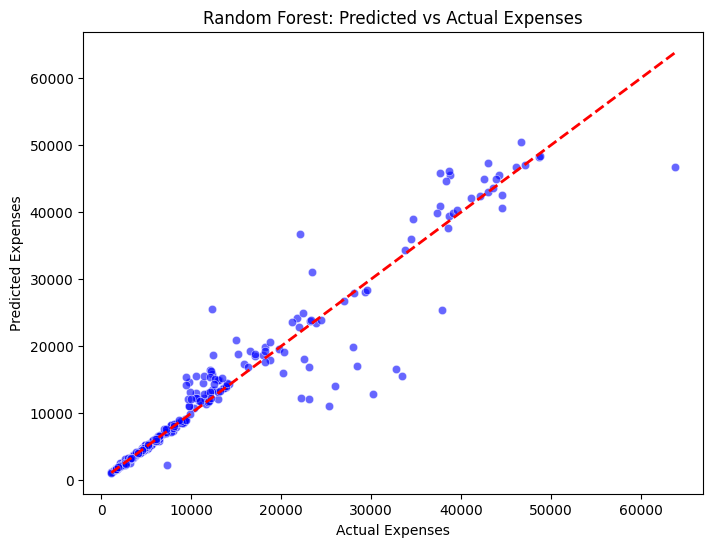

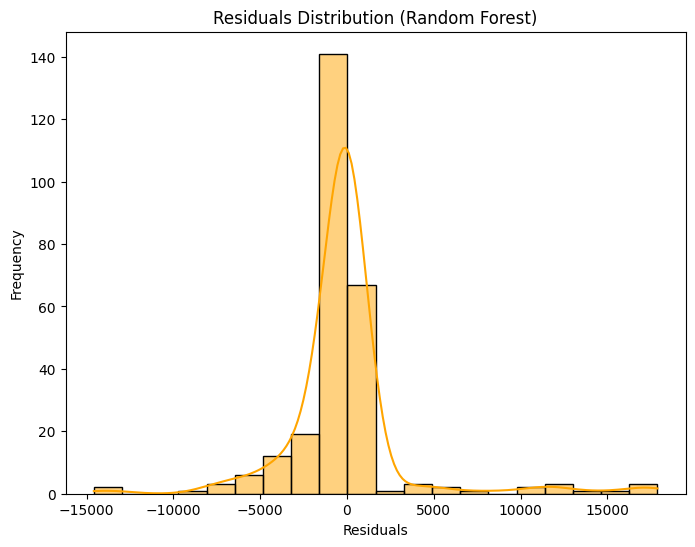

In [73]:
#Visualize Predictions
# Plot Predicted vs Actual Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Random Forest: Predicted vs Actual Expenses")
plt.xlabel("Actual Expenses")
plt.ylabel("Predicted Expenses")
plt.show()

# Plot Residuals
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, bins=20, color='orange')
plt.title("Residuals Distribution (Random Forest)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

First Image : Residuals Distribution

Key Observations:

	•	The residuals are centered around zero, indicating the model doesn’t systematically overpredict or underpredict.
	•	Most residuals are close to zero, indicating the model performs well for most predictions.
	•	There are some extreme residuals (both positive and negative) at the tails, which may indicate outliers or cases where the model struggles.

  Conclusion:

	•	The residuals’ distribution is approximately symmetric, which suggests that the model’s errors are normally distributed.
	•	The presence of outliers could benefit from further investigation (e.g., checking for influential points or extreme data).

Second Image : Predicted vs. Actual Scatter Plot

Key Observations:

	•	Most points lie close to the red dashed line, indicating accurate predictions for the majority of the dataset.
	•	Some points deviate significantly from the line, indicating instances where the model underpredicts or overpredicts expenses.
	•	The distribution of points suggests that the model performs consistently well across a range of expense values but may struggle slightly for higher expense values (outliers visible in the top right).

Conclusion:

	•	The model demonstrates strong predictive power with most predictions aligning closely with the actual values.
	•	The slight deviations suggest that while the model performs well overall, there is room for improvement, especially in handling extreme cases.

Model Comparison Table:
                             Model  Mean Squared Error (MSE)  R-squared (R²)
0                Linear Regression              3.652554e+07        0.750752
1       Multiple Linear Regression              3.363908e+07        0.783321
2                    Decision Tree              1.542535e+07        0.900641
3                    Random Forest              1.117561e+07        0.928015
4  Support Vector Regression (SVR)              2.095687e+07        0.865011


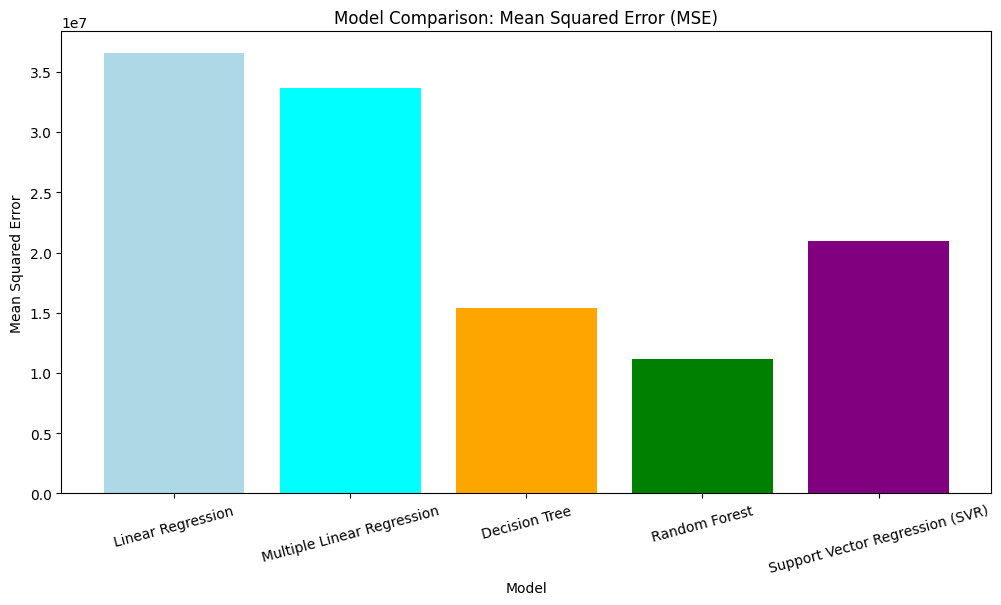

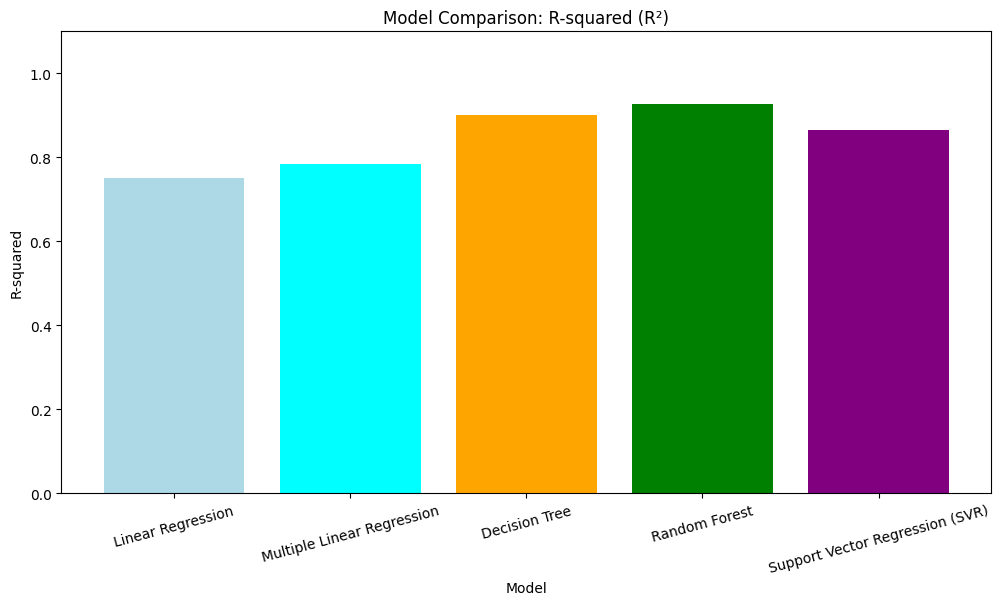

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the model metrics
# Replace these placeholders with the actual metrics for your models
model_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Multiple Linear Regression',
        'Decision Tree',
        'Random Forest',
        'Support Vector Regression (SVR)'
    ],
    'Mean Squared Error (MSE)': [
        lr_mse,
        mlr_mse,
        mse_pruned,
        mse_best_rf,
        mse_svr
    ],
    'R-squared (R²)': [
        lr_r2,
        mlr_r2,
        r2_pruned,
        r2_best_rf,
        r2_svr
    ]
})

# Display the comparison table
print("Model Comparison Table:")
print(model_comparison)

# Plot the MSE for comparison
plt.figure(figsize=(12, 6))
plt.bar(model_comparison['Model'], model_comparison['Mean Squared Error (MSE)'],
        color=['lightblue', 'cyan', 'orange', 'green', 'purple'])
plt.title("Model Comparison: Mean Squared Error (MSE)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=15)
plt.show()

# Plot the R-squared for comparison
plt.figure(figsize=(12, 6))
plt.bar(model_comparison['Model'], model_comparison['R-squared (R²)'],
        color=['lightblue', 'cyan', 'orange', 'green', 'purple'])
plt.title("Model Comparison: R-squared (R²)")
plt.xlabel("Model")
plt.ylabel("R-squared")
plt.xticks(rotation=15)
plt.ylim(0, 1.1)  # Set y-axis limit to 1 for R-squared
plt.show()

Conclusion and Interpretation

Based on the comparison of the models, including Linear Regression, Multiple Linear Regression, Decision Tree, Random Forest, and Support Vector Regression (SVR), the following conclusions can be drawn:

1. Model Performance Overview

Mean Squared Error (MSE)

	•	Linear Regression:
	•	MSE = 36,525,540: This indicates the highest average squared error among all models, reflecting its limited ability to capture complex relationships in the data.
	•	Interpretation: Linear Regression struggles to handle non-linear relationships or interactions among the predictors, leading to higher errors.
	•	Multiple Linear Regression:
	•	MSE = 33,639,080: A slight improvement over Linear Regression due to the inclusion of interaction terms or additional predictors.
	•	Interpretation: While it improves upon Linear Regression, its performance is still suboptimal for capturing non-linear patterns.
	•	Decision Tree:
	•	MSE = 15,425,350: A significant improvement compared to both linear models.
	•	Interpretation: Decision Trees handle non-linearity and feature interactions effectively, but overfitting can occur without proper pruning.
	•	Random Forest:
	•	MSE = 11,175,610: The best performance in terms of error minimization.
	•	Interpretation: The ensemble nature of Random Forest reduces overfitting and generalizes well to unseen data, making it the most accurate model for this dataset.
	•	Support Vector Regression (SVR):
	•	MSE = 20,956,870: Performs better than the linear models but worse than the ensemble methods (Random Forest).
	•	Interpretation: SVR captures non-linear patterns well but struggles slightly compared to Random Forest due to its sensitivity to hyperparameter tuning.

R-squared (R²)

	•	Linear Regression (R² = 0.750):
	•	Explains 75% of the variance in expenses, indicating limited explanatory power.
	•	Multiple Linear Regression (R² = 0.783):
	•	Explains 78.3% of the variance, a modest improvement over Linear Regression.
	•	Decision Tree (R² = 0.901):
	•	Explains 90% of the variance, demonstrating its ability to capture complex interactions in the data.
	•	Random Forest (R² = 0.928):
	•	Explains 92.8% of the variance, making it the most powerful model in terms of prediction and capturing data variance.
	•	Support Vector Regression (R² = 0.865):
	•	Explains 86.5% of the variance, showcasing good performance but slightly behind Random Forest.

2. Insights from Visualizations

Mean Squared Error (MSE) Bar Chart
	•	Random Forest achieves the lowest MSE, indicating it makes the most accurate predictions.
	•	Decision Trees and SVR also perform well but are outperformed by Random Forest.
	•	Linear Regression and Multiple Linear Regression have significantly higher MSEs, suggesting they struggle with the complexity of the data.

R-squared (R²) Bar Chart

	•	Random Forest achieves the highest R², explaining the most variance in the target variable.
	•	Decision Trees and SVR also show strong R² values, indicating good predictive power.
	•	Linear Regression and Multiple Linear Regression fall short, indicating they fail to fully capture the complexity of the data.

3. Final Recommendations
	1.	Best Model:
	•	Random Forest is the best-performing model in terms of both MSE and R². It balances predictive accuracy and robustness, making it ideal for this dataset.
	2.	Considerations:
	•	While Random Forest performs best, it is more computationally intensive. If efficiency is critical, Decision Trees or SVR may serve as viable alternatives.
	3.	Improvements:
	•	Further feature engineering, such as transformations or interaction terms, could enhance model performance.
	•	Hyperparameter tuning for all models could further optimize results.
	4.	Applications:
	•	Random Forest can be used for precise predictions of medical expenses, while insights from feature importance can guide policy or decision-making.

Conclusion

This analysis demonstrates that while simpler models like Linear Regression provide a baseline understanding, more sophisticated methods like Random Forest and SVR are crucial for capturing the complexity in the data. Random Forest emerges as the best model, offering both accuracy and interpretability, making it a powerful tool for predicting medical expenses.